**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de dados de 100 pacientes, afim de prever o cancer de prostata


link dataset: https://www.kaggle.com/sajidsaifi/prostate-cancer





importndo algumas das principais biblioteca como pandas e matplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import  norm
import seaborn as sns

Atribuir a uma variável o dataset escolhido

In [17]:
df = pd.read_csv('/content/drive/My Drive/Prostate_Cancer.csv')

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [19]:
df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [20]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [21]:
#separando nódulos malignos e benignos para fazer a comparação
benignos = df[df.diagnosis_result == 'B'].reset_index(drop=True)
malignos = df[df.diagnosis_result == 'M'].reset_index(drop=True)

* Testando o atributo de raio




/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


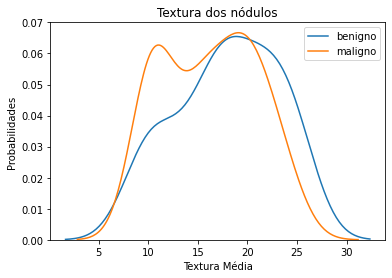

In [23]:
# distribuição de probabilidade comparando o raio media para as duas classes
sns.distplot(benignos.radius, hist=False, rug=False,label='benigno')
sns.distplot(malignos.radius, hist=False, rug=False,label='maligno')
plt.xlabel('Textura Média')
plt.ylabel('Probabilidades')
plt.title('Textura dos nódulos')
plt.legend()
plt.show()

Média e desvio diferentes porém próximos entre os atributos


In [24]:
#calculando estatísticas das amostras
x1 = benignos.radius.mean()
s1 = benignos.radius.std()

x2 = malignos.radius.mean()
s2 = malignos.radius.std()

print(x1,s1)
print(x2,s2)

17.94736842105263 5.061499448919091
16.177419354838708 4.678251717547273


In [25]:
n1 = benignos.shape[0]
n2 = malignos.shape[0]
print('quantidade de nódulos benignos:',n1)
print('quantidade de nódulos malignos:',n2)

quantidade de nódulos benignos: 38
quantidade de nódulos malignos: 62


* Teste a hipótese de que as duas distribuições tem a mesma média, ao nível de 5%
1. Formule as hipóteses
  * $H_0: \mu_1 - \mu_2 = 0$
  * $H_a: \mu_1 - \mu_2 \neq 0$
2. Especifique o nível de significância
  * $\alpha = 0.05$

In [26]:
alpha = 0.05

Encontre as regiões de não-rejeição e críticas

In [27]:
#calcula z critico
zc = norm.ppf(1-alpha/2)
zc

1.959963984540054

In [29]:
#importando biblioteca math
from math import sqrt
z_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2)/n2))
z_calc

1.7463758231359516

In [30]:
#toma decisao
if z_calc< -zc or z_calc> zc:
  print('Rejeita H0')
else:
  print('Falha em rejeitar H0')

Falha em rejeitar H0


Falhou-se em rejeitar H0, ou seja a o resultado está na região de não rejeição, e H0 é relevante

Testando atributo smoothness


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


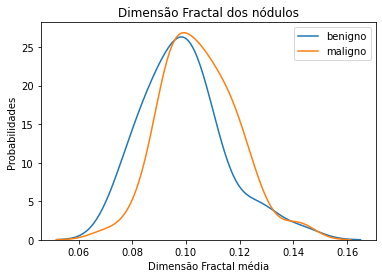

In [31]:
# distribuição de probabilidade comparando a suavidade media para as duas classes
sns.distplot(benignos.smoothness, hist=False, rug=False,label='benigno')
sns.distplot(malignos.smoothness, hist=False, rug=False,label='maligno')
plt.xlabel('Dimensão Fractal média')
plt.ylabel('Probabilidades')
plt.title('Dimensão Fractal dos nódulos')
plt.legend()
plt.show()

In [32]:
#calculando estatísticas das amostras
x1 = benignos.smoothness.mean()
s1 = benignos.smoothness.std()

x2 = malignos.smoothness.mean()
s2 = malignos.smoothness.std()

print(x1,s1)
print(x2,s2)

0.09905263157894735 0.015194144263980502
0.10498387096774195 0.013939555624175082


In [33]:
#estabelecendo nível de confiança do teste
alpha = 0.05

In [34]:
#calcula z critico
zc = norm.ppf(1-alpha/2)
zc

1.959963984540054

In [35]:
#calcule a estatística do teste
z_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2)/n2))
z_calc

-1.9544768765001606

In [36]:
#toma decisao
if z_calc< -zc or z_calc> zc:
  print('Rejeita H0')
else:
  print('Falha em rejeitar H0')

Falha em rejeitar H0


Falhou-se em rejeitar H0, ou seja a o resultado está na região de não rejeição, e H0 é relevante

* Testando simetria* média utilizando amostras pequenas

In [41]:
from scipy.stats import t
benignos = benignos[:15]
malignos = malignos[:15]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


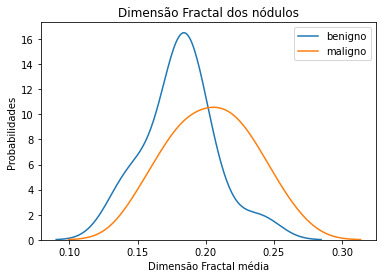

In [42]:
# distribuição de probabilidade comparando a simetria media para as duas classes
sns.distplot(benignos.symmetry, hist=False, rug=False,label='benigno')
sns.distplot(malignos.symmetry, hist=False, rug=False,label='maligno')
plt.xlabel('Dimensão Fractal média')
plt.ylabel('Probabilidades')
plt.title('Dimensão Fractal dos nódulos')
plt.legend()
plt.show()

In [43]:
#calculando estatísticas das amostras
x1 = benignos.symmetry.mean()
s1 = benignos.symmetry.std()

x2 = malignos.symmetry.mean()
s2 = malignos.symmetry.std()

print(x1,s1)
print(x2,s2)

0.1811333333333333 0.025581429276127707
0.20406666666666667 0.03067913825076454


In [44]:
n1 = benignos.shape[0]
n2 = malignos.shape[0]

Variâncias diferentes

In [45]:
phi = n1-1 if n1<n2 else n2-1

In [47]:
#recuperando t da tabela
t_alpha_phi = t.ppf(1-alpha/2,phi)
t_alpha_phi

2.1447866879169273

 * estatística do teste para variâncias diferentes

  $t_{calc} = \dfrac{(\overline{x_1} - \overline{x_2})-(\mu_1 - \mu_2)}{\sqrt{\dfrac{s_1^2}{n_1}+\dfrac{s_2^2}{n_2}}}$

In [48]:
t_calc = (x1-x2)/(sqrt((s1**2)/n1 + (s2**2/n2)))
t_calc

-2.2235566934768936

In [49]:
#tomando decisão
if t_calc < -abs(t_alpha_phi) or t_calc > abs(t_alpha_phi):
  print('Rejeite H0')
else:
  print('Falha em reijeitar H0')

Rejeite H0


H0 foi rejeitado, ou seja a o resultado está na região crítica, com as medias bem diferentes